In [2]:
import tensorflow as tf
from keras.datasets import fashion_mnist

(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train.shape
X_train.dtype

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


dtype('uint8')

In [3]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [5]:
class_names[y_train[0]]

'Ankle boot'

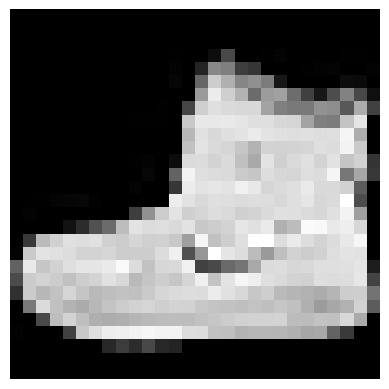

In [6]:
import matplotlib.pyplot as plt
# Displays an image
plt.imshow(X_train[0], cmap="gray")
plt.axis("off")
plt.show()

In [7]:
from keras.layers import InputLayer, Flatten, Dense
from keras.models import Sequential
# Set the random seed for reproducibility

tf.random.set_seed(42)
# model=Sequential() # simplest keras model, composed of single stack of layers connected sequentially
# model.add(InputLayer(input_shape=[28,28]))
# model.add(Flatten())
# model.add(Dense(300,activation="relu"))
# model.add(Dense(100,activation="relu"))
# model.add(Dense(10,activation="softmax"))
# model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [9]:
# In complex scripts with loops and reloads
from keras.backend import clear_session
clear_session()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
tf.random.set_seed(42)
# We can specify all the layers in the sequentia call and drop the the input layer at the begining

model = Sequential(
    [
        Flatten(input_shape=(28,28)),
        Dense(300,activation = tf.keras.activations.relu),
        Dense(100,activation = tf.keras.activations.relu),
        Dense(10,activation = tf.keras.activations.softmax)

    ]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Getting weights and biases
hidden1= model.get_layer("dense")
weights,biases = hidden1.get_weights()

In [12]:
weights.shape


(784, 300)

In [13]:
biases.shape

(300,)

In [14]:
# Compiling the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # "sgd" with learning rate of 0.01 , use keras.optimizers.SGD(learning_rate=?) for learning rate of your choice

In [18]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1) #instead of validation data

Epoch 1/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9199 - loss: 0.2300 - val_accuracy: 0.8824 - val_loss: 0.3369
Epoch 2/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9209 - loss: 0.2261 - val_accuracy: 0.8827 - val_loss: 0.3381
Epoch 3/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9229 - loss: 0.2224 - val_accuracy: 0.8835 - val_loss: 0.3359
Epoch 4/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9242 - loss: 0.2190 - val_accuracy: 0.8844 - val_loss: 0.3364
Epoch 5/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9260 - loss: 0.2154 - val_accuracy: 0.8851 - val_loss: 0.3367
Epoch 6/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9274 - loss: 0.2119 - val_accuracy: 0.8855 - val_loss: 0.3361
Epoch 7/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9283 - loss: 0.2085 - val_accuracy: 0.8867 - val_loss: 0.3354
Epoch 8/30
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9292 - loss: 0.2050

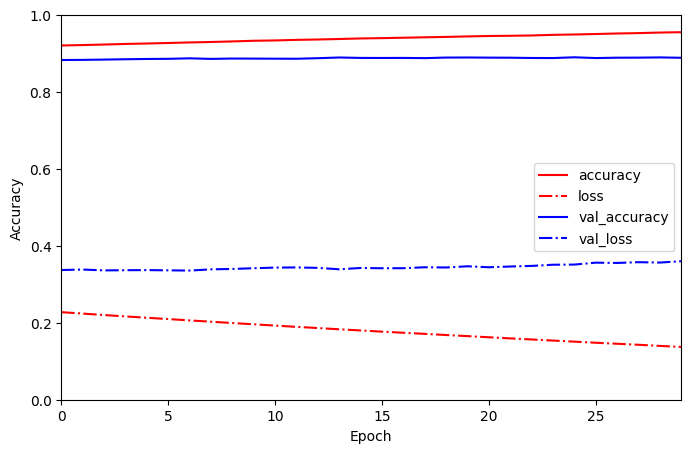

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], xlabel="Epoch", ylabel="Accuracy", style=["r-", "r-.", "b-", "b-."])
plt.show()


# # Create an array of original epochs
# epochs = history_df.index.values

# # Shift training metrics by -0.5
# shifted_epochs = epochs - 0.5

# # Create a new DataFrame just for plotting
# plot_df = pd.DataFrame({
#     'Train Accuracy': history_df['accuracy'].values,
#     'Val Accuracy': history_df['val_accuracy'].values,
# }, index=epochs)

# # Plot using manual control
# plt.figure(figsize=(8, 5))

# # Plot shifted training accuracy
# plt.plot(shifted_epochs, history_df['accuracy'], "r-", label="Train Accuracy (shifted)")

# # Plot validation accuracy (not shifted)
# plt.plot(epochs, history_df['val_accuracy'], "b-.", label="Val Accuracy")

# # Customize the plot
# plt.xlim([0, len(epochs)-1])
# plt.ylim([0, 1])
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.title("Training vs Validation Accuracy (shifted)")
# plt.legend()
# plt.grid(True)
# plt.show()

In [17]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.764303,0.726350,0.807818,0.550794
1,0.828889,0.494639,0.826909,0.494154
2,0.843596,0.448627,0.835818,0.465094
3,0.853313,0.421031,0.843636,0.444775
4,0.859939,0.400783,0.850182,0.430127
5,0.864909,0.384845,0.853818,0.416891
6,0.869414,0.371417,0.857818,0.407284
7,0.873091,0.359793,0.862364,0.398529
8,0.875677,0.349384,0.863818,0.391192
9,0.878263,0.340049,0.867636,0.384826


In [48]:
# Prediction time
import numpy as np
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_pred = y_pred.argmax(-1)

np.array(class_names)[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

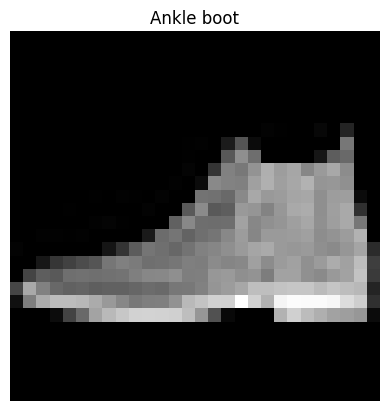

-------


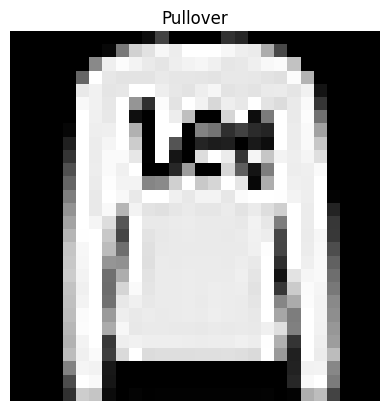

-------


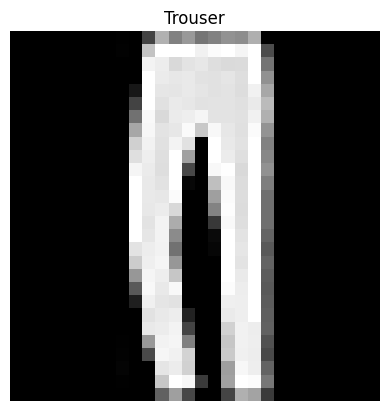

-------


In [53]:
for i in range(3) :
  plt.imshow(X_new[i],cmap="gray")
  plt.axis("off")
  plt.title(class_names[y_pred[i]])
  plt.show()
  print("-------")

In [ ]:
# Now you know how to use the Sequential API to build, train, evaluate, and use a classification MLP.